# Ejercicio

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

## Paso 1: Carga del conjunto de datos

In [9]:
datos = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [11]:
datos.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
df = datos[["MedInc", "Latitude", "Longitude"]]

In [13]:
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [14]:
X_train, X_test= train_test_split(df, test_size=0.2, random_state=42)

In [21]:
X_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,3
5390,2.9344,34.03,-118.38,3
860,5.7192,37.58,-121.96,0


## Paso 2: Construcción K-Means con 6 clusters

In [16]:
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [17]:
clusters = model.labels_
clusters

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [19]:
X_train['cluster'] = clusters # ESto es la y_train

In [20]:
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


In [31]:
centroides = pd.DataFrame(model.cluster_centers_ , columns=['MedInc', 'Latitude', 'Longitude'])
centroides


,MedInc,Latitude,Longitude
0,5.379149,37.687473,-121.915490
1,4.349296,33.889409,-118.003011
2,6.942516,33.849436,-118.041128
3,2.428598,34.041570,-118.024257
4,11.748734,35.878171,-120.284228
5,2.739928,38.143643,-121.622997


C:\Users\Sergio\AppData\Local\Temp\ipykernel_16956\3010121085.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', 6)


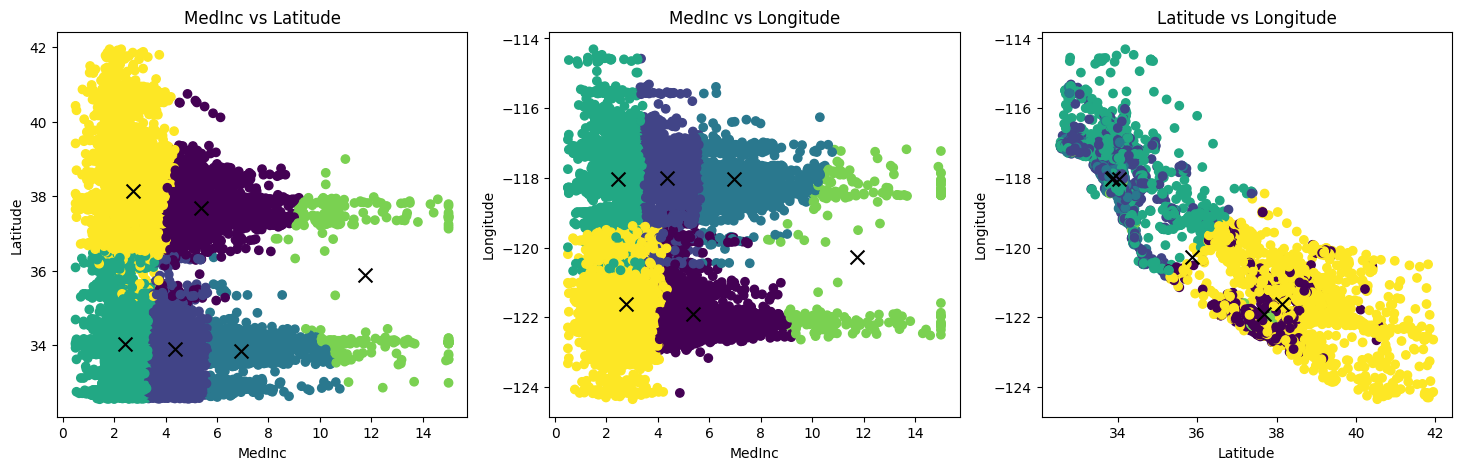

In [32]:
combinaciones = [('MedInc', 'Latitude'), ('MedInc', 'Longitude'), ('Latitude', 'Longitude')]

cmap = cm.get_cmap('viridis', 6)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x_col, y_col) in enumerate(combinaciones):
    axes[i].scatter(X_train[x_col], X_train[y_col], c=X_train['cluster'], cmap=cmap)
    axes[i].scatter(centroides[x_col], centroides[y_col], color='black', marker='x', s=100, label='Centroides')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.show()

## Paso 3: Predice con el conjunto de test

In [33]:
predictions = model.predict(X_test)

In [36]:
X_test['cluster'] = predictions # Esto sería la y_test

In [37]:
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


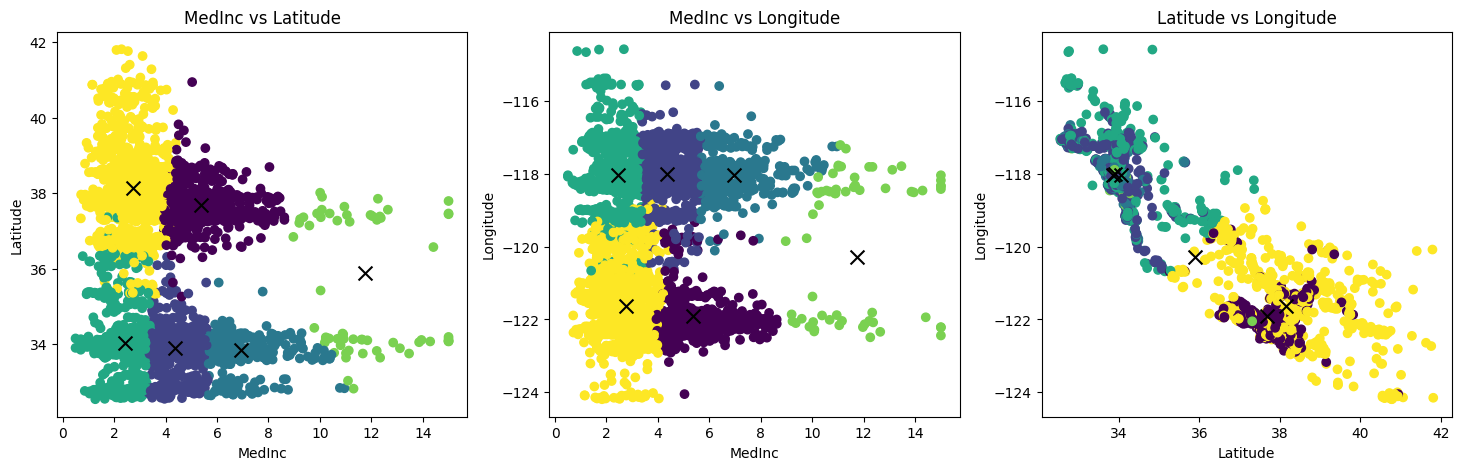

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x_col, y_col) in enumerate(combinaciones):
    axes[i].scatter(X_test[x_col], X_test[y_col], c=X_test['cluster'], cmap=cmap)
    axes[i].scatter(centroides[x_col], centroides[y_col], color='black', marker='x', s=100, label='Centroides')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'{x_col} vs {y_col}')

plt.show()

## Paso 4: Entrena un modelo de clasificación supervisada


Lo haremos con un decission tree que nos permitirá clasificar en 6 categorías y no necesita de normalización.

In [40]:
model_sup = DecisionTreeClassifier(random_state = 42)
model_sup.fit(X_train, clusters)

DecisionTreeClassifier(random_state=42)

Dibujamos el árbol

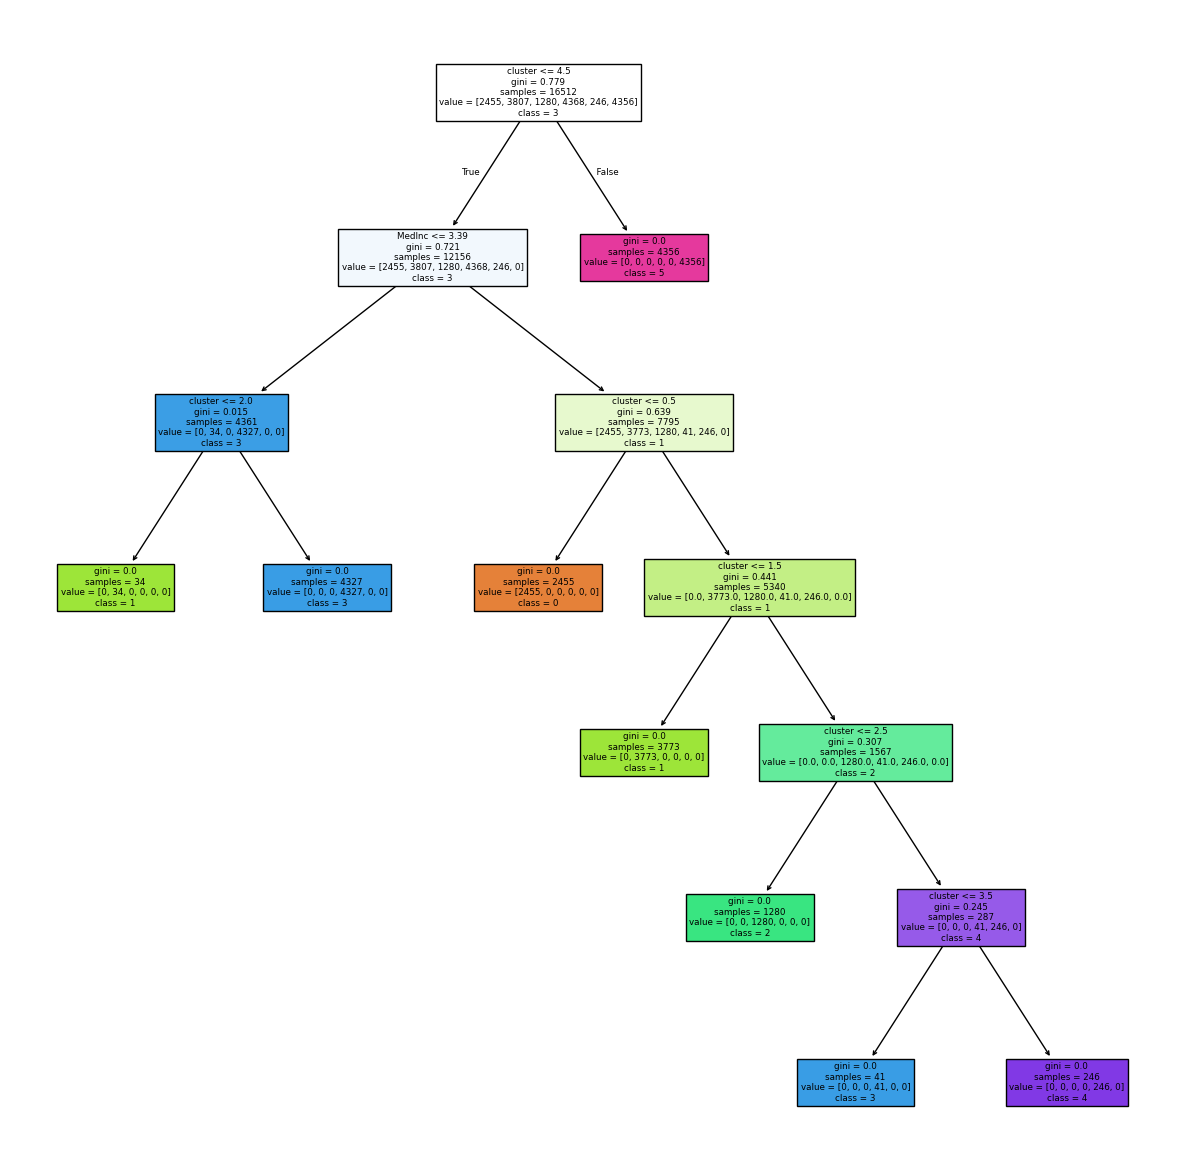

In [41]:

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

A pesar de que hay 6 categorçias y la cantidad de datos no es pequeña se ha obtenido un árbol bastante óptimo

In [43]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

Precisión obtenida con el árbol

In [45]:
accuracy_score(predictions, y_pred)

1.0

EL modelo ha conseguido predecir las categorías de manera perfecta

## Paso 5: guardar los modelos

In [49]:
dump(model, open("k-means_default_42.sav", "wb"))
dump(model_sup, open("decision_tree_classifier_default_42.sav", "wb"))